In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [ ]:
# Normalize images
x_train = x_train / 255.0
x_test  = x_test / 255.0


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

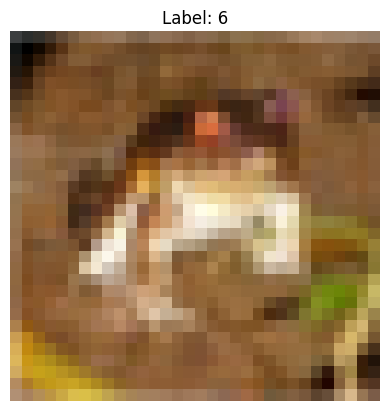

In [ ]:
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.axis("off")


In [ ]:
def normal_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    return model


In [ ]:
cnn_model = normal_cnn()

cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_cnn = cnn_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 150ms/step - accuracy: 0.3610 - loss: 1.7468 - val_accuracy: 0.5775 - val_loss: 1.2150
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.6156 - loss: 1.0888 - val_accuracy: 0.6749 - val_loss: 0.9371
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 158ms/step - accuracy: 0.6899 - loss: 0.8858 - val_accuracy: 0.6825 - val_loss: 0.9117
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 154ms/step - accuracy: 0.7330 - loss: 0.7575 - val_accuracy: 0.7130 - val_loss: 0.8318
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 148ms/step - accuracy: 0.7702 - loss: 0.6708 - val_accuracy: 0.7318 - val_loss: 0.7846
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 147ms/step - accuracy: 0.7910 - loss: 0.5987 - val_accuracy: 0.7316 - val_loss: 0.7978
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 147ms/step - accuracy: 0.8169 - loss: 0.5269 - val_accuracy: 0.7343 - val_loss: 0.8206
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step - accuracy: 0.8374 -

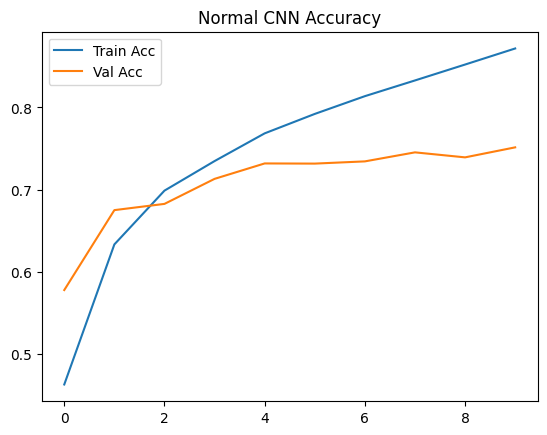

In [7]:
plt.plot(history_cnn.history["accuracy"], label="Train Acc")
plt.plot(history_cnn.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Normal CNN Accuracy")
plt.show()


In [8]:
def residual_block(x, filters):
    shortcut = x

    x = layers.Conv2D(filters, (3,3), padding="same", activation="relu")(x)
    x = layers.Add()([x, shortcut])
    x = layers.Activation("relu")(x)

    return x


In [11]:
def residual_cnn():
    inputs = layers.Input(shape=(32,32,3))

    x = layers.Conv2D(32, (3,3), padding="same", activation="relu")(inputs)
    x = layers.MaxPooling2D()(x)

    # Residual Block
    x = residual_block(x, 32)

    x = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Flatten()(x) # Corrected line
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)

    model = models.Model(inputs, outputs)
    return model

In [12]:
res_model = residual_cnn()

res_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_res = res_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 113s 142ms/step - accuracy: 0.3991 - loss: 1.6582 - val_accuracy: 0.5842 - val_loss: 1.1557
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 139ms/step - accuracy: 0.6213 - loss: 1.0815 - val_accuracy: 0.6568 - val_loss: 0.9771
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 141ms/step - accuracy: 0.6904 - loss: 0.8973 - val_accuracy: 0.6865 - val_loss: 0.9154
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 142ms/step - accuracy: 0.7267 - loss: 0.7892 - val_accuracy: 0.6897 - val_loss: 0.9009
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 141ms/step - accuracy: 0.7540 - loss: 0.7009 - val_accuracy: 0.7089 - val_loss: 0.8390
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 142ms/step - accuracy: 0.7883 - loss: 0.6138 - val_accuracy: 0.7029 - val_loss: 0.8898
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 150ms/step - accuracy: 0.8088 - loss: 0.5459 - val_accuracy: 0.7140 - val_loss: 0.8538
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 142ms/step - accuracy: 0.8395 -

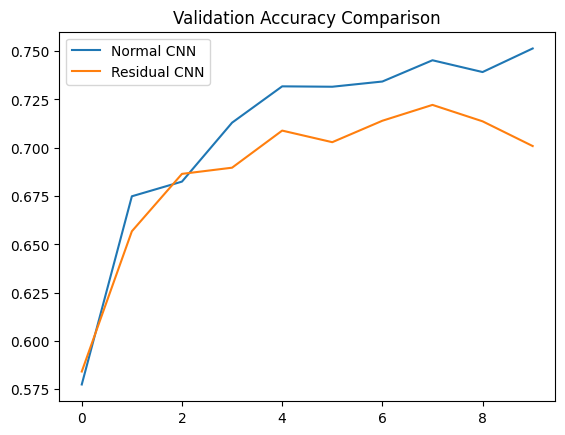

In [18]:
plt.plot(history_cnn.history["val_accuracy"], label="Normal CNN")
plt.plot(history_res.history["val_accuracy"], label="Residual CNN")
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()
